Pilar Navarro Ramírez

In [ ]:
import pandas as pd
import numpy as np
from mnist import MNIST
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.models import Sequential
from keras.layers import Flatten, Dense, Conv2D, AveragePooling2D
from keras.utils.np_utils import to_categorical

sns.set(style='white', context='notebook', palette='deep')

%matplotlib inline

## Lectura de los datos y preprocesamiento

In [ ]:
mndata = MNIST('data')

x_train, y_train = mndata.load_training()
x_test, y_test = mndata.load_testing()

x_train = np.asarray(x_train)
y_train = np.asarray(y_train)
x_test = np.asarray(x_test)
y_test = np.asarray(y_test)

In [ ]:
x_train = x_train.reshape((len(x_train),28,28))
x_test = x_test.reshape((len(x_test),28,28))

In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
y_train=pd.DataFrame(y_train)

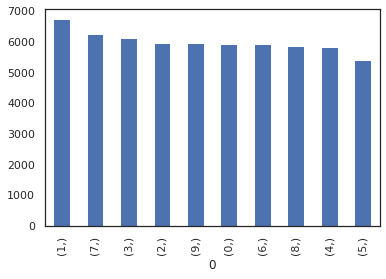

In [ ]:
hist = y_train.value_counts()
hist.plot.bar()

In [ ]:
#normalization
x_train = x_train / 255.0
x_test = x_test / 255.0\begin

In [ ]:
#reshape
x_train = x_train.reshape(-1, 28,28,1)
x_test = x_test.reshape(-1, 28,28,1)
# Padding the input to make it 32x32. Specification of LeNET
x_train = np.pad(x_train, [(0, 0), (2, 2), (2, 2), (0, 0)], "constant") 
x_test = np.pad(x_test, [(0, 0), (2, 2), (2, 2), (0, 0)], "constant") 

In [ ]:
#label encoding
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [ ]:
y_train[0]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
#split data into training and validation
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.1, random_state = 2)

In [ ]:
print("X_train shape: ", x_train.shape)
print("X_val shape: ", x_val.shape)
print("y_train shape: ", y_train.shape)
print("y_val shape: ", y_val.shape)

X_train shape:  (54000, 32, 32, 1)
X_val shape:  (6000, 32, 32, 1)
y_train shape:  (54000, 10)
y_val shape:  (6000, 10)


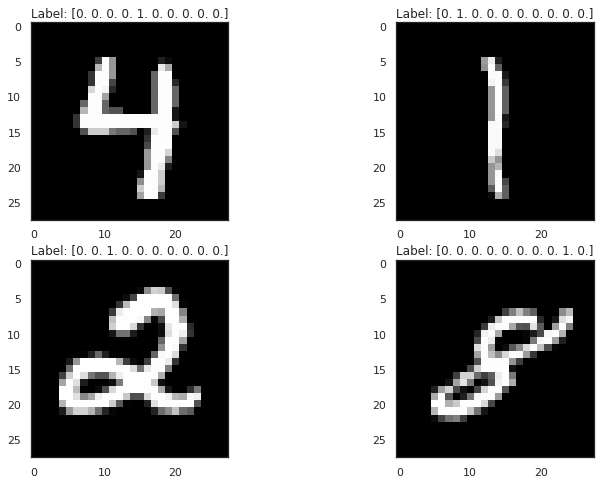

In [ ]:
nrows = 2
ncols = 2

pic_indexes = np.random.randint(x_train.shape[0], size=(nrows*ncols))

f, axs = plt.subplots(nrows, ncols, figsize=(12, 8))
axs = axs.flatten()

picture_index  = 0

for picture_index, ax in zip(pic_indexes, axs):
        ax.imshow(x_train[picture_index].reshape(28, 28), cmap='gray')
        ax.set_title(f'Label: {y_train[picture_index]}')

plt.show()

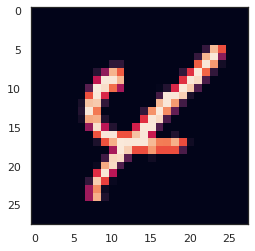

In [ ]:
g = plt.imshow(x_train[0][:,:,0])

## LeNet

In [ ]:
model = Sequential()

model.add(Conv2D(filters=6, kernel_size = (5,5), padding = 'valid', activation= 'tanh', input_shape = (32,32,1),strides=(1,1)))
model.add(AveragePooling2D(pool_size = (2,2),strides=(2,2)))

model.add(Conv2D(filters=16, kernel_size = (5,5), padding = 'valid', activation= 'tanh',strides=(1,1)))
model.add(AveragePooling2D(pool_size = (2,2),strides=(2,2)))

model.add(Flatten())
model.add(Dense(120, activation = 'tanh'))
model.add(Dense(84, activation = 'tanh'))
model.add(Dense(10, activation = 'softmax'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d_4 (Average (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_5 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 120)               48120     
_________________________________________________________________
dense_7 (Dense)              (None, 84)               

In [ ]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
epochs = 50 
batch_size = 86

In [ ]:
# Fit the model
history = model.fit(x_train,y_train, batch_size=batch_size,
                            epochs = epochs, validation_data = (x_val,y_val),
                              verbose = 2, steps_per_epoch=x_train.shape[0] // batch_size)

Epoch 1/50
627/627 - 26s - loss: 0.3162 - accuracy: 0.9073 - val_loss: 0.1571 - val_accuracy: 0.9567
Epoch 2/50
627/627 - 25s - loss: 0.1170 - accuracy: 0.9655 - val_loss: 0.0999 - val_accuracy: 0.9687
Epoch 3/50
627/627 - 25s - loss: 0.0758 - accuracy: 0.9772 - val_loss: 0.0806 - val_accuracy: 0.9730
Epoch 4/50
627/627 - 25s - loss: 0.0549 - accuracy: 0.9832 - val_loss: 0.0666 - val_accuracy: 0.9783
Epoch 5/50
627/627 - 25s - loss: 0.0419 - accuracy: 0.9865 - val_loss: 0.0568 - val_accuracy: 0.9822
Epoch 6/50
627/627 - 25s - loss: 0.0345 - accuracy: 0.9888 - val_loss: 0.0509 - val_accuracy: 0.9840
Epoch 7/50
627/627 - 25s - loss: 0.0287 - accuracy: 0.9909 - val_loss: 0.0595 - val_accuracy: 0.9822
Epoch 8/50
627/627 - 25s - loss: 0.0229 - accuracy: 0.9930 - val_loss: 0.0490 - val_accuracy: 0.9855
Epoch 9/50
627/627 - 25s - loss: 0.0198 - accuracy: 0.9938 - val_loss: 0.0495 - val_accuracy: 0.9850
Epoch 10/50
627/627 - 25s - loss: 0.0158 - accuracy: 0.9953 - val_loss: 0.0507 - val_accura

In [ ]:
# Confusion matrix 

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Resultados

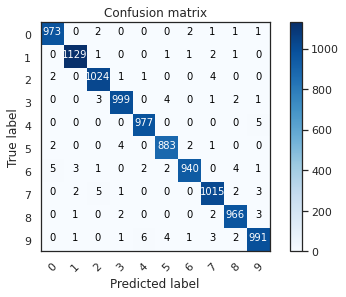

In [ ]:
# Predict the values from the test dataset
y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors 
y_pred_classes = np.argmax(y_pred,axis = 1) 
# Convert test observations to one hot vectors
y_true = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10)) 

In [ ]:
score = model.evaluate(x_test, y_test, verbose = 0)
print("Test Accuracy: ",score[1])

Test Accuracy:  0.9897000193595886


In [ ]:
result = model.predict(x_test)

result = np.argmax(result, axis=1)

result = pd.Series(result, name='Label')

result.head()

0    7
1    2
2    1
3    0
4    4
Name: Label, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, '(Test data) Number of Digits classes predicted')

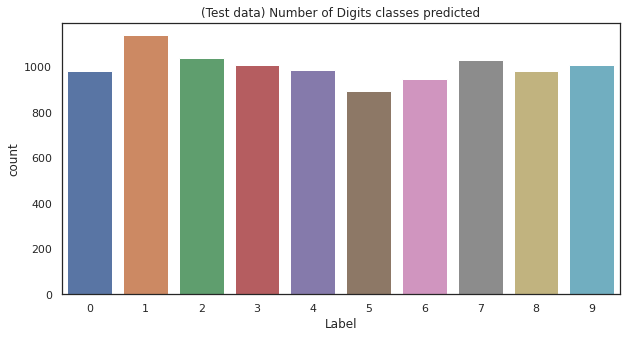

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(result)
plt.title("(Test data) Number of Digits classes predicted")

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, '(Test data) Number of Digits classes real')

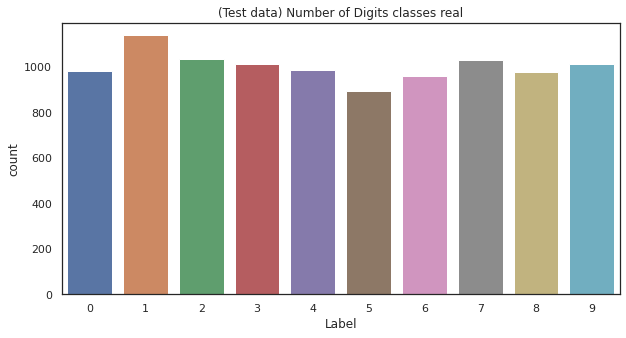

In [ ]:
plt.figure(figsize=(10,5))
y_true = pd.Series(y_true, name='Label')
sns.countplot(y_true)
plt.title("(Test data) Number of Digits classes real")